In [26]:
import pandas as pd
from datetime import datetime
from datetime import date
import os
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Optional
import sys

In [32]:
full_path = os.getcwd()
full_path.partition('MLOps_project')[0] + 'MLOps_project/src'


'/Users/vilmanorja/Library/CloudStorage/OneDrive-AaltoUniversity/Yliopisto/Maisterikurssit/Exchange courses/MLOps/Project/MLOps_project/src'

In [36]:
isinstance(df, pd.DataFrame)

True

In [ ]:

full_path = os.getcwd()

In [29]:
from mlops_credit_scoring.pipelines.data_cleaning.nodes import clean_Transactions

In [25]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), "../..")))

NameError: name '__file__' is not defined

In [ ]:

sys.path

['/Users/vilmanorja/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python311.zip',
 '/Users/vilmanorja/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11',
 '/Users/vilmanorja/.local/share/uv/python/cpython-3.11.12-macos-aarch64-none/lib/python3.11/lib-dynload',
 '',
 '/Users/vilmanorja/Library/CloudStorage/OneDrive-AaltoUniversity/Yliopisto/Maisterikurssit/Exchange courses/MLOps/mlops_env_uv2/lib/python3.11/site-packages']

# Customers

In [42]:
full_path = os.getcwd()
df = pd.read_csv(full_path.partition('notebooks')[0] + 'data/02_intermediate/transactions_validated.csv')
df[:100].to_csv(full_path.partition('notebooks')[0] + "tests/pipelines/sample/sample_transactions.csv", index=False)
df = pd.read_csv(full_path.partition('notebooks')[0] + 'data/03_primary/transactional_summaries/customer_transactional_summary_20240131.csv')
df[:100].to_csv(full_path.partition('notebooks')[0] + "tests/pipelines/sample/sample_transactions_cleaned.csv", index=False)

In [15]:
import re
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]
df.columns = df.columns.str.replace('.', '_', regex=False)

In [16]:
df['date_of_birth']#.dtypes#.apply(type).value_counts()

0                NaN
1                NaN
2                NaN
3                NaN
4         2012-07-01
             ...    
122207    1973-01-16
122208    1978-01-10
122209    1964-01-16
122210           NaN
122211    2007-07-24
Name: date_of_birth, Length: 122212, dtype: object

In [17]:
for c in ['customer_since', 'date_of_birth', 'birth_in_corp_date']:
    float_mask = df[c].apply(lambda x: isinstance(x, float))
    if float_mask.any():
        print(f"\n⚠️ Column '{c}' has {float_mask.sum()} float values:")
        print(df.loc[float_mask, c])


⚠️ Column 'date_of_birth' has 12933 float values:
0         NaN
1         NaN
2         NaN
3         NaN
10        NaN
         ... 
122175    NaN
122196    NaN
122200    NaN
122205    NaN
122210    NaN
Name: date_of_birth, Length: 12933, dtype: object

⚠️ Column 'birth_in_corp_date' has 109132 float values:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
122206    NaN
122207    NaN
122208    NaN
122209    NaN
122211    NaN
Name: birth_in_corp_date, Length: 109132, dtype: object


In [18]:
df[['customer_since', 'date_of_birth', 'birth_in_corp_date']].dtypes

customer_since        object
date_of_birth         object
birth_in_corp_date    object
dtype: object

In [19]:
def safe_parse(val):
    try:
        if pd.isna(val):
            return None
        val_str = str(int(val))  # Convert float like 20250101.0 to '20250101'
        return datetime.strptime(val_str, "%Y-%m-%d")#.strftime('%Y-%m-%d')
    except ValueError:
        return None
    
for c in ['customer_since', 'date_of_birth', 'birth_in_corp_date']:
    print(df[c].isna().sum())
    #df[c] = df[c].apply(lambda x: None if isinstance(x, float) else x)
    # float_mask = df[c].apply(lambda x: isinstance(x, float))

    #df[c] = df[c].fillna('1970-01-01')
    # if float_mask.any():
    #     print(f"\n⚠️ Column '{c}' has {float_mask.sum()} float values:")
    #     print(df.loc[float_mask, c])
    df[c] = df[c].apply(safe_parse)
    # df[c] = df[c].apply(
    #     lambda x: x.strftime('%Y-%m-%d') if pd.notnull(x) else None
    # )
    df[c] = df[c].fillna(datetime(1970,1,1))
    print(df[c].isna().sum())

0
0
12933
0
109132
0


In [20]:
df_copy = df.copy()
def safe_parse(val):
    try:
        if pd.isna(val):
            return None
        val_str = str(int(val))  # Convert float like 20250101.0 to '20250101'
        return datetime.strptime(val_str, "%Y%m%d")#.strftime('%Y-%m-%d')
    except ValueError:
        return None  # Or return None

for c in ['legal_iss_date', 'legal_exp_date']:
    original_nulls = df[c].isna()
    df[c] = df[c].str.split('ý').str[-1]
 
    #df[c] = pd.to_datetime(df[c], format = "%Y%m%d", errors="coerce")
    df[c] = df[c].apply(safe_parse)

    # After conversion
    new_nulls = df[c].isna()

    # Find values that became null during conversion
    converted_to_null = new_nulls & ~original_nulls
    print(c)
    # Show the rows where conversion resulted in nulls
    print(df_copy[[c]][converted_to_null])

legal_iss_date
Empty DataFrame
Columns: [legal_iss_date]
Index: []
legal_exp_date
Empty DataFrame
Columns: [legal_exp_date]
Index: []


In [21]:
df[['legal_iss_date', 'legal_exp_date']]#.dtypes

,legal_iss_date,legal_exp_date
0,NaT,None
1,NaT,None
2,NaT,None
3,NaT,None
4,2012-11-13,2050-11-13 00:00:00
...,...,...
122207,2025-05-20,2028-05-19 00:00:00
122208,2017-06-14,2027-06-13 00:00:00
122209,2016-10-13,2026-10-12 00:00:00
122210,2017-12-06,2099-12-06 00:00:00


In [22]:
df.select_dtypes('object').columns

Index(['customer_status', 'employment_status', 'gender', 'marital_status',
       'placebrth', 'cust_type', 'nationality', 'ocupation_desc',
       'residence_code', 'residence_status', 'residence_type', 'seg_group',
       'title', 'town_country', 'cust_type_1', 'habliter', 'province',
       'district', 'legal_doc_name1_id_description', 'legal_exp_date',
       'legal_iss_auth', 'a_m_l_risk_rating'],
      dtype='object')

In [23]:
for c in df.select_dtypes('object').columns:
    if df[c].dropna().nunique() < 177:
        print(f'"column": "{c}", "value_set": {df[c].dropna().unique().tolist()}')

"column": "customer_status", "value_set": ['Private Client - Standard', 'Corporate - Small', 'Corporate - Medium', 'Private Client High Networth', 'Corporate - Large', 'Financial - Large', 'Financial - Small', 'Proprietorship Standard', 'T24 Updates', 'Deceased Individual', 'Partnership firm Standard', 'Financial - Medium', 'Partnership High Networth', 'Customer Deletion', 'Governmental', 'Hotlisted', 'Proprietorship Highnetworth']
"column": "employment_status", "value_set": ['MB', 'LP', 'OTHER', 'EMPLOYED', 'TPE', 'UNEMPLOYED', 'SELF-EMPLOYED', 'RET', 'UE', 'STUDENT', 'RETIRED']
"column": "gender", "value_set": ['FEMALE', 'MALE']
"column": "marital_status", "value_set": ['OTHER', 'DIVORCED', 'SINGLE', 'MARRIED', 'PARTNER', 'WIDOWED']
"column": "cust_type", "value_set": ['RETAIL', 'CORPORATE', 'PROSPECT']
"column": "nationality", "value_set": ['Portugal', 'Mozambique', 'India', 'Pakistan', 'Peoples Republic of China', 'Tokelau', 'South Africa', 'Turkey', 'Netherlands', 'Egypt', 'Switze

In [24]:
df.select_dtypes(include=['datetime'])

,customer_since,date_of_birth,birth_in_corp_date,legal_iss_date
0,1970-01-01,1970-01-01,1970-01-01,NaT
1,1970-01-01,1970-01-01,1970-01-01,NaT
2,1970-01-01,1970-01-01,1970-01-01,NaT
3,1970-01-01,1970-01-01,1970-01-01,NaT
4,1970-01-01,1970-01-01,1970-01-01,2012-11-13
...,...,...,...,...
122207,1970-01-01,1970-01-01,1970-01-01,2025-05-20
122208,1970-01-01,1970-01-01,1970-01-01,2017-06-14
122209,1970-01-01,1970-01-01,1970-01-01,2016-10-13
122210,1970-01-01,1970-01-01,1970-01-01,2017-12-06


In [25]:
l = []
for c in df.select_dtypes('object').columns:
    if df[c].dropna().nunique() >= 177:
        l.append(c)
        print(f'{c}: {df[c].dropna().nunique()}')

l

placebrth: 11573
ocupation_desc: 474
town_country: 3191
district: 973
legal_exp_date: 12168
legal_iss_auth: 10303


['placebrth',
 'ocupation_desc',
 'town_country',
 'district',
 'legal_exp_date',
 'legal_iss_auth']

In [26]:
df.select_dtypes('number').describe()

,new_id,no_of_dependents,segment_id,industry_id,legal_doc_name1_id,yr_net_monthly_in
count,122212.000000,3786.000000,122205.000000,107633.000000,122208.000000,5.011800e+04
mean,61106.500000,2.834654,1.343873,76978.222952,3.950560,1.228929e+05
std,35279.709886,1.937088,1.175580,22448.809188,7.732261,6.358335e+06
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00
25%,30553.750000,2.000000,1.000000,64199.000000,1.000000,1.000000e+04
50%,61106.500000,2.000000,1.000000,85103.000000,1.000000,2.000000e+04
75%,91659.250000,4.000000,1.000000,96090.000000,2.000000,5.000000e+04
max,122212.000000,20.000000,12.000000,99000.000000,47.000000,8.529458e+08


In [27]:
df.select_dtypes('number').dtypes

new_id                  int64
no_of_dependents      float64
segment_id            float64
industry_id           float64
legal_doc_name1_id    float64
yr_net_monthly_in     float64
dtype: object

In [28]:
df.select_dtypes('number').nunique()

new_id                122212
no_of_dependents          19
segment_id                12
industry_id              542
legal_doc_name1_id        41
yr_net_monthly_in      11197
dtype: int64

In [30]:
df.isna().sum()

new_id                                 0
customer_since                         0
customer_status                        0
date_of_birth                          0
employment_status                  72543
gender                             12923
marital_status                     23030
placebrth                          22259
cust_type                          25784
nationality                            0
no_of_dependents                  118426
ocupation_desc                     18765
residence_code                         6
residence_status                  110069
residence_type                    110327
segment_id                             7
seg_group                              7
title                              21970
town_country                         453
birth_in_corp_date                     0
cust_type_1                        25784
industry_id                        14579
habliter                           47702
province                            2173
district        

In [29]:
# df[['NoOfDependents', 'SegmentId', 'IndustryId', 'LegalDocName1Id']] = df[['NoOfDependents', 'SegmentId', 'IndustryId', 'LegalDocName1Id']].astype('Int64')

for c in ['NoOfDependents', 'SegmentId', 'IndustryId', 'LegalDocName1Id']:
    # Before conversion
    original_nulls = df[c].isna()

    # Convert to Int64 (nullable int)
    df[c] = df[c].fillna(-1)
    df[c] = df[c].astype('int')

    # After conversion
    new_nulls = df[c].isna()

    # Find values that became null during conversion
    converted_to_null = new_nulls & ~original_nulls

    # Show the rows where conversion resulted in nulls
    print(df[converted_to_null])


KeyError: 'NoOfDependents'

In [20]:
df.dtypes

new_id                                     int64
customer_since                    datetime64[ns]
customer_status                           object
date_of_birth                     datetime64[ns]
employment_status                         object
gender                                    object
marital_status                            object
placebrth                                 object
cust_type                                 object
nationality                               object
no_of_dependents                         float64
ocupation_desc                            object
residence_code                            object
residence_status                          object
residence_type                            object
segment_id                               float64
seg_group                                 object
title                                     object
town_country                              object
birth_in_corp_date                datetime64[ns]
cust_type_1         

# Funds_hist

In [7]:
funds = pd.read_csv(full_path.partition('notebooks')[0] + 'data/01_raw/Funds_Hist_to_20240331.csv')
funds

,Date,CustomerId,FundsBalance
0,1/31/2023,111104,1.138203e+06
1,1/31/2023,47805,3.710000e+00
2,1/31/2023,70722,8.114757e+03
3,1/31/2023,83881,4.307745e+05
4,1/31/2023,80030,0.000000e+00
...,...,...,...
634198,3/31/2024,104164,0.000000e+00
634199,3/31/2024,83393,0.000000e+00
634200,3/31/2024,108145,5.000045e+03
634201,3/31/2024,50633,0.000000e+00


In [8]:
funds.dtypes

Date             object
CustomerId        int64
FundsBalance    float64
dtype: object

In [ ]:
print(f"Duplicated Values: {funds.duplicated().sum()}")

Missing Values: 0


In [24]:
for column in funds.columns:
    print(f"Null values for {column}: {funds[column].isnull().sum()}")


Null values for Date: 0
Null values for CustomerId: 0
Null values for FundsBalance: 0


In [10]:
funds[[ 'FundsBalance']].describe().T

,count,mean,std,min,25%,50%,75%,max
FundsBalance,634203.0,657471.495291,1.248800e+07,0.0,130.310302,2862.274141,34519.39488,1.680625e+09


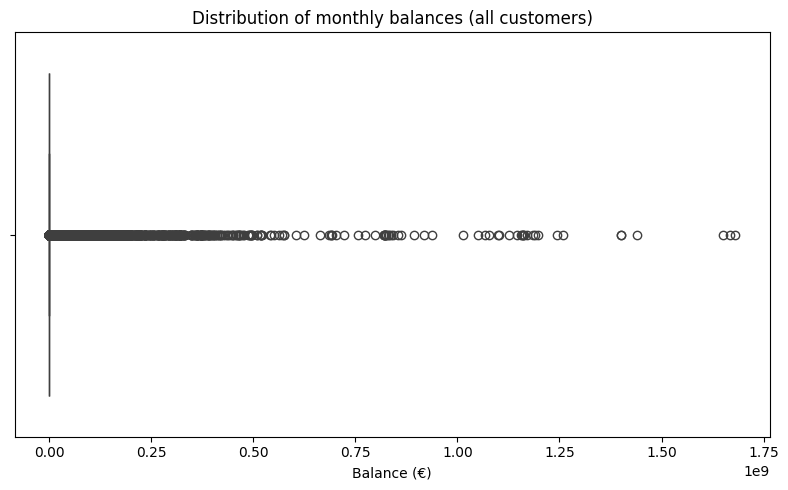

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# General boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=funds['FundsBalance'])
plt.title('Distribution of monthly balances (all customers)')
plt.xlabel('Balance (€)')
plt.tight_layout()
plt.show()


# Transactions

In [18]:
transactions = pd.read_csv(full_path.partition('notebooks')[0] + 'data/01_raw/Transactions_to_20240331.csv')
transactions

,Date,TransactionId,CustomerIdDebitNew,CustomerIdCreditNew,TransactionType,TransactionCategory,Currency,Amount,AmountMZN
0,2023-01-03,1,NaN,NaN,C,ACRE,MZN,100.00,100.00
1,2023-01-03,2,NaN,NaN,C,ACRE,MZN,199.87,199.87
2,2023-01-03,3,111024.0,24625.0,D,IT,ZAR,27524.86,103686.15
3,2023-01-03,4,82540.0,NaN,D,ACAW,MZN,500.00,500.00
4,2023-01-03,5,NaN,NaN,C,ACKG,MZN,6263.19,6263.19
...,...,...,...,...,...,...,...,...,...
8101677,2024-03-28,8101678,76001.0,89312.0,D,AC11,MZN,1000.00,1000.00
8101678,2024-03-28,8101679,96246.0,NaN,D,ACAW,MZN,3000.00,3000.00
8101679,2024-03-28,8101680,41006.0,NaN,D,ACMD,MZN,200.00,200.00
8101680,2024-03-28,8101681,35060.0,69668.0,D,ACBJ,MZN,1613.25,1613.25


In [20]:
transactions.dtypes

Date                   datetime64[ns]
TransactionId                   int64
CustomerIdDebitNew            float64
CustomerIdCreditNew           float64
TransactionType                object
TransactionCategory            object
Currency                       object
Amount                        float64
AmountMZN                     float64
YearMonth                   period[M]
dtype: object

In [21]:
transactions.duplicated().sum()

0

In [23]:
transactions.isna().sum()

Date                         0
TransactionId                0
CustomerIdDebitNew     3405090
CustomerIdCreditNew    5825053
TransactionType              0
TransactionCategory          0
Currency                     0
Amount                       0
AmountMZN                    0
YearMonth                    0
dtype: int64

In [19]:
import pandas as pd

# Ensure 'Date' column is in datetime format
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions['YearMonth'] = transactions['Date'].dt.to_period('M')

# ========= Debit side: treat as expenses =========
debit_df = transactions.dropna(subset=['CustomerIdDebitNew']).copy()
debit_df['CustomerId'] = debit_df['CustomerIdDebitNew']
debit_df['Role'] = 'Debit'

# ========= Credit side: treat as income =========
credit_df = transactions.dropna(subset=['CustomerIdCreditNew']).copy()
credit_df['CustomerId'] = credit_df['CustomerIdCreditNew']
credit_df['Role'] = 'Credit'

# ========= Combine both =========
combined_df = pd.concat([debit_df, credit_df], ignore_index=True)

# ========= Group by Customer and Month =========
monthly_summary = (
    combined_df
    .groupby(['CustomerId', 'YearMonth', 'Role'])['AmountMZN']
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

# Optional: Rename for clarity
monthly_summary = monthly_summary.rename(columns={
    'Credit': 'Total_Credit_MZN',
    'Debit': 'Total_Debit_MZN'
})

# ========= Detect outliers: negative values =========
outliers = monthly_summary[
    (monthly_summary['Total_Credit_MZN'] < 0) |
    (monthly_summary['Total_Debit_MZN'] < 0)
]

# ========= Find customers with missing months =========
all_months = pd.period_range(transactions['Date'].min(), transactions['Date'].max(), freq='M')
all_customers = combined_df['CustomerId'].unique()

full_index = pd.MultiIndex.from_product([all_customers, all_months], names=['CustomerId', 'YearMonth'])
full_df = pd.DataFrame(index=full_index).reset_index()

# Merge with monthly summary
full_summary = pd.merge(full_df, monthly_summary, on=['CustomerId', 'YearMonth'], how='left')

# Rows where both credit and debit are NaN = no activity that month
missing_months = full_summary[
    full_summary['Total_Credit_MZN'].isna() & full_summary['Total_Debit_MZN'].isna()
]

# ========= Outputs =========
print("Sample monthly summary:")
print(monthly_summary.head())

print("\nOutliers (negative values):")
print(outliers)

print(f"\nMissing months per customer (total rows = {len(missing_months)}):")
print(missing_months.head())


Sample monthly summary:
Role  CustomerId YearMonth  Total_Credit_MZN  Total_Debit_MZN
0           87.0   2023-01               0.0             0.61
1           87.0   2023-03               0.0         10149.05
2           87.0   2023-04               0.0        280000.00
3           87.0   2024-01            1632.0             0.00
4           94.0   2023-09          290000.0             0.00

Outliers (negative values):
Empty DataFrame
Columns: [CustomerId, YearMonth, Total_Credit_MZN, Total_Debit_MZN]
Index: []

Missing months per customer (total rows = 296115):
    CustomerId YearMonth  Total_Credit_MZN  Total_Debit_MZN
50    104307.0   2023-06               NaN              NaN
52    104307.0   2023-08               NaN              NaN
53    104307.0   2023-09               NaN              NaN
59    104307.0   2024-03               NaN              NaN
91     39392.0   2023-02               NaN              NaN


# Loans

In [3]:
loans_path=full_path.partition('notebooks')[0] + 'data/01_raw/loans'

In [11]:
for filename in os.listdir(loans_path):
    if filename.endswith(".csv"): 
        print(f"\n--- EDA for {filename} ---")
        df = pd.read_csv(os.path.join(loans_path, filename))
        print(df.info())
        print('\n Percentage of missing values: \n',df.isnull().mean().sort_values(ascending=False).head())
        print('\n Duplicated rows: ', df.duplicated().sum())
        print('\n Value counts in "HasDefault": \n', df['HasDefault'].value_counts())
        print(df.describe(include='all').T)


--- EDA for Loans_20230831.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CreditEOMStartDate         500 non-null    object 
 1   SnapshotDate               500 non-null    object 
 2   CustomerNewId              500 non-null    int64  
 3   ContractId                 500 non-null    int64  
 4   SegmentDesc                500 non-null    object 
 5   CreditType                 500 non-null    object 
 6   CreditAmount               500 non-null    float64
 7   Outstanding                500 non-null    float64
 8   CreditEOMEndDate           462 non-null    object 
 9   NumberOfInstallmentsToPay  381 non-null    float64
 10  PaymentFrequency           500 non-null    object 
 11  Arreas                     386 non-null    float64
 12  HasDefault                 500 non-null    int64  
dtypes: float64(4),

# Loans_Hist

In [25]:
loans_hist = pd.read_csv(full_path.partition('notebooks')[0] + 'data/01_raw/Loans_Hist_to_20240331.csv')
loans_hist

C:\Users\rcouc\AppData\Local\Temp\ipykernel_21812\3404880019.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  loans_hist = pd.read_csv(full_path.partition('notebooks')[0] + 'data/01_raw/Loans_Hist_to_20240331.csv')


,SnapshotDate,CustomerNewId,ContractId,SegmentDesc,CreditType,CreditAmount,Outstanding,CreditEOMStartDate,CreditEOMEndDate,NumberOfInstallmentsToPay,PaymentFrequency,Arreas,HasDefault
0,7/31/2023,112740,407419,Retail,Unarranged Overdraft,2.934165e+04,4.181495e+04,11/30/2022,NaN,NaN,Single,245.0,1
1,7/31/2023,82482,3,Retail,Arranged Overdraft,4.503029e+04,4.491781e+04,12/31/2021,10/31/2023,NaN,Single,0.0,0
2,7/31/2023,5729,5,Wholesale,Arranged Overdraft,1.000000e+07,0.000000e+00,3/31/2021,8/31/2023,NaN,Single,0.0,0
3,7/31/2023,28809,6,Wholesale,Arranged Overdraft,3.000000e+07,0.000000e+00,1/31/2022,8/31/2023,NaN,Single,0.0,0
4,7/31/2023,111035,7,Wholesale,Arranged Overdraft,4.280630e+08,4.277343e+08,6/30/2023,10/31/2023,NaN,Single,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107202,3/31/2024,64354,4143917,Retail,Public Sector Employee Loan,6.000000e+04,6.000000e+04,3/31/2024,3/31/2029,61.0,Monthly,NaN,0
107203,3/31/2024,110312,3777782,Wholesale,Bill of Exchange Discount,5.200000e+06,5.200000e+06,2/29/2024,5/31/2024,NaN,Single,NaN,0
107204,3/31/2024,118307,3904345,Wholesale,Bill of Exchange Discount,5.161600e+06,5.161600e+06,3/31/2024,5/31/2024,NaN,Single,NaN,0
107205,3/31/2024,57869,3977110,Wholesale,Bill of Exchange Discount,2.017099e+06,2.017099e+06,3/31/2024,5/31/2024,NaN,Single,NaN,0


In [26]:
loans_hist.dtypes

SnapshotDate                  object
CustomerNewId                  int64
ContractId                     int64
SegmentDesc                   object
CreditType                    object
CreditAmount                 float64
Outstanding                  float64
CreditEOMStartDate            object
CreditEOMEndDate              object
NumberOfInstallmentsToPay     object
PaymentFrequency              object
Arreas                       float64
HasDefault                     int64
dtype: object

In [29]:
print("Duplicated Values: ", loans_hist.duplicated().sum())
print("Null values: \n", loans_hist.isnull().sum())

Duplicated Values:  0
Null values: 
 SnapshotDate                     0
CustomerNewId                    0
ContractId                       0
SegmentDesc                      0
CreditType                       0
CreditAmount                    41
Outstanding                      0
CreditEOMStartDate              41
CreditEOMEndDate             15192
NumberOfInstallmentsToPay    59586
PaymentFrequency                 0
Arreas                       57942
HasDefault                       0
dtype: int64


In [37]:
na_percent = (loans_hist.isna().mean() * 100).round(2)
print(na_percent.sort_values(ascending=False))

NumberOfInstallmentsToPay    55.58
Arreas                       54.05
CreditEOMEndDate             14.17
CreditAmount                  0.04
CreditEOMStartDate            0.04
SnapshotDate                  0.00
CustomerNewId                 0.00
ContractId                    0.00
SegmentDesc                   0.00
CreditType                    0.00
Outstanding                   0.00
PaymentFrequency              0.00
HasDefault                    0.00
dtype: float64


In [39]:
# Identify missing values in CreditAmount and CreditEOMStartDate
missing_credit_amount = loans_hist["CreditAmount"].isna()
missing_start_date = loans_hist["CreditEOMStartDate"].isna()

# Count how many rows are missing both values
n_missing_both = (missing_credit_amount & missing_start_date).sum()
print(f"Rows with both CreditAmount and CreditEOMStartDate missing: {n_missing_both}")


Rows with both CreditAmount and CreditEOMStartDate missing: 41


In [41]:
mask_contract_ended = loans_hist["CreditEOMEndDate"].notna() & loans_hist["NumberOfInstallmentsToPay"].isna()
mask_contract_ended.sum()

44394

In [ ]:
def plot_numeric_histograms(
    df, 
    columns: Optional[List[str]] = None, 
    bins: int = 100, 
    log_scale: bool = False, 
    figsize: tuple = (8, 4)
) -> None:
    """
    Plots histograms for selected numeric columns in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list, optional): List of columns to plot. If None, all numeric columns are used.
        bins (int): Number of histogram bins.
        log_scale (bool): Whether to apply log scale to x-axis.
        figsize (tuple): Size of each individual plot.
    """

    # Auto-select numeric columns if not specified
    if columns is None:
        columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()

    for col in columns:
        if df[col].dropna().empty:
            continue  # Skip columns with only NaNs

        plt.figure(figsize=figsize)
        sns.histplot(df[col].dropna(), bins=bins, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        if log_scale:
            plt.xscale("log")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


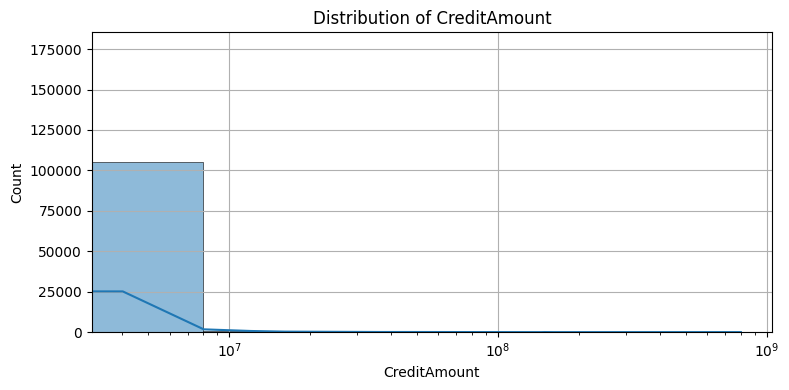

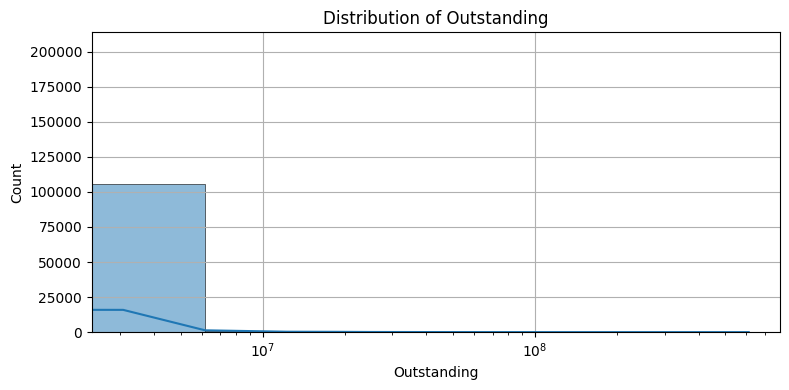

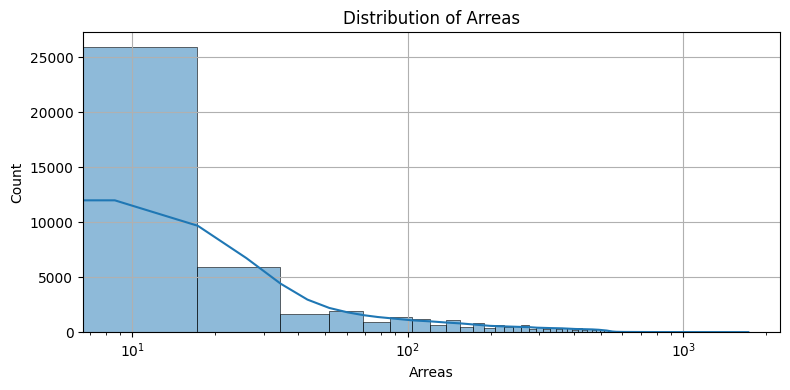

In [35]:
plot_numeric_histograms(loans_hist, columns=["CreditAmount", "Outstanding", "Arreas"], log_scale=True)
